13.Demonstrate different options of handling missing values

In [1]:
import pandas as pd
import numpy as np
# Create a sample DataFrame with missing values
data = {
 'A': [1, 2, np.nan, 4, 5],
 'B': [np.nan, 10, 20, np.nan, 50],
 'C': ['a', 'b', np.nan, np.nan, 'e']
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print()
# Option 1: Remove rows with missing values
df_dropna = df.dropna()
print("DataFrame after dropping rows with missing values:")
print(df_dropna)
print()
# Option 2: Fill missing values with a specific constant
df_fill_constant = df.fillna(0)
print("DataFrame after filling missing values with a constant:")
print(df_fill_constant)
print()
# Option 3: Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_fill_mean = df.copy()
for col in numeric_cols:
    df_fill_mean[col] = df_fill_mean[col].fillna(df_fill_mean[col].mean())
print("DataFrame after filling missing numeric values with mean:")
print(df_fill_mean)
print()
# Option 4: Fill missing categorical values with mode
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
df_fill_mode = df.copy()
for col in categorical_cols:
    df_fill_mode[col] = df_fill_mode[col].fillna(df_fill_mode[col].mode().iloc[0])
print("DataFrame after filling missing categorical values with mode:")
print(df_fill_mode)
print()
# Option 5: Interpolate missing values
df_interpolate = df.interpolate()
print("DataFrame after interpolating missing values:")
print(df_interpolate)
print()

Original DataFrame:
     A     B    C
0  1.0   NaN    a
1  2.0  10.0    b
2  NaN  20.0  NaN
3  4.0   NaN  NaN
4  5.0  50.0    e

DataFrame after dropping rows with missing values:
     A     B  C
1  2.0  10.0  b
4  5.0  50.0  e

DataFrame after filling missing values with a constant:
     A     B  C
0  1.0   0.0  a
1  2.0  10.0  b
2  0.0  20.0  0
3  4.0   0.0  0
4  5.0  50.0  e

DataFrame after filling missing numeric values with mean:
     A          B    C
0  1.0  26.666667    a
1  2.0  10.000000    b
2  3.0  20.000000  NaN
3  4.0  26.666667  NaN
4  5.0  50.000000    e

DataFrame after filling missing categorical values with mode:
     A     B  C
0  1.0   NaN  a
1  2.0  10.0  b
2  NaN  20.0  a
3  4.0   NaN  a
4  5.0  50.0  e

DataFrame after interpolating missing values:
     A     B    C
0  1.0   NaN    a
1  2.0  10.0    b
2  3.0  20.0  NaN
3  4.0  35.0  NaN
4  5.0  50.0    e



14.Demonstrate elimination of data noise using various kinds of binning functions

In [3]:
import pandas as pd

# Create a sample DataFrame with continuous data
data = {
    'value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print()

# Equal-width binning
equal_width_bins = pd.cut(df['value'], bins=3, labels=['Low', 'Medium', 'High'], right=False)
df['equal_width_bin'] = equal_width_bins

# Equal-frequency binning (quantile binning)
equal_freq_bins = pd.qcut(df['value'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
df['equal_freq_bin'] = equal_freq_bins

# Custom binning
custom_bins = [0, 20, 40, 60]
custom_bin_labels = ['Low', 'Medium', 'High']
custom_bins_result = pd.cut(df['value'], bins=custom_bins, labels=custom_bin_labels, right=False)
df['custom_bin'] = custom_bins_result

print("DataFrame after binning:")
print(df)


Original DataFrame:
   value
0     10
1     15
2     20
3     25
4     30
5     35
6     40
7     45
8     50
9     55

DataFrame after binning:
   value equal_width_bin equal_freq_bin custom_bin
0     10             Low            Low        Low
1     15             Low            Low        Low
2     20             Low            Low     Medium
3     25          Medium            Low     Medium
4     30          Medium         Medium     Medium
5     35          Medium         Medium     Medium
6     40            High         Medium       High
7     45            High           High       High
8     50            High           High       High
9     55            High           High       High


17.Write a program to implement Apriori algorithm for association rule mining

In [4]:
def generate_candidates(prev_candidates, k):
    """Generate candidate itemsets of size k from the previous itemsets."""
    candidates = set()
    for itemset1 in prev_candidates:
        for itemset2 in prev_candidates:
            if len(itemset1.union(itemset2)) == k:
                candidates.add(itemset1.union(itemset2))
    return candidates

def prune_infrequent(itemsets, min_support, transactions):
    """Prune infrequent itemsets that do not meet the minimum support threshold."""
    frequent_itemsets = set()
    support_counts = {}
    total_transactions = len(transactions)
    for transaction in transactions:
        for itemset in itemsets:
            if itemset.issubset(transaction):
                support_counts[itemset] = support_counts.get(itemset, 0) + 1

    for itemset, support_count in support_counts.items():
        support = support_count / total_transactions
        if support >= min_support:
            frequent_itemsets.add(itemset)

    return frequent_itemsets

def apriori(transactions, min_support):
    """Apriori algorithm for frequent itemset mining."""
    # Initialize frequent itemsets of size 1
    frequent_itemsets = set()
    for transaction in transactions:
        for item in transaction:
            frequent_itemsets.add(frozenset([item]))

    # Generate frequent itemsets of size k until no more frequent itemsets can be found
    k = 2
    while frequent_itemsets:
        # Generate candidate itemsets of size k
        candidates = generate_candidates(frequent_itemsets, k)

        # Prune candidate itemsets that do not meet the minimum support threshold
        frequent_itemsets = prune_infrequent(candidates, min_support, transactions)

        if frequent_itemsets:
            print(f"Frequent Itemsets of size {k-1}:")
            for itemset in frequent_itemsets:
                print(itemset)
            print()

        k += 1

# Example usage
if __name__ == "__main__":
    # Sample transactions
    transactions = [
        {'milk', 'bread', 'butter'},
        {'milk', 'bread'},
        {'milk', 'apple'},
        {'milk', 'bread', 'butter', 'apple'},
        {'bread', 'butter', 'apple'}
    ]

    # Minimum support threshold
    min_support = 0.4
    apriori(transactions, min_support)


Frequent Itemsets of size 1:
frozenset({'butter', 'milk'})
frozenset({'bread', 'butter'})
frozenset({'butter', 'apple'})
frozenset({'bread', 'apple'})
frozenset({'apple', 'milk'})
frozenset({'bread', 'milk'})

Frequent Itemsets of size 2:
frozenset({'bread', 'butter', 'apple'})
frozenset({'bread', 'butter', 'milk'})



18.Write a program to implement ID3 classification algorithm

In [5]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, attribute=None, value=None, label=None):
        self.attribute = attribute  # Attribute to split on
        self.value = value          # Value of the attribute for splitting
        self.label = label          # Label (class) for leaf nodes
        self.children = {}          # Dictionary to store child nodes

class ID3Classifier:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _entropy(self, y):
        counter = Counter(y)
        entropy = 0
        total_samples = len(y)
        for label in counter:
            p = counter[label] / total_samples
            entropy -= p * np.log2(p)
        return entropy

    def _information_gain(self, X, y, attribute, value):
        subset_indices = X[:, attribute] == value
        subset_entropy = 0
        for label in np.unique(y):
            label_subset_indices = subset_indices & (y == label)
            label_subset_count = np.sum(label_subset_indices)
            label_subset_entropy = label_subset_count / np.sum(subset_indices) * self._entropy(y[label_subset_indices])
            subset_entropy += label_subset_entropy
        return self._entropy(y[subset_indices]) - subset_entropy

    def _choose_best_attribute(self, X, y):
        max_info_gain = -np.inf
        best_attribute = None
        for attribute in range(X.shape[1]):
            values = np.unique(X[:, attribute])
            for value in values:
                info_gain = self._information_gain(X, y, attribute, value)
                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    best_attribute = (attribute, value)
        return best_attribute

    def _build_tree(self, X, y):
        if len(np.unique(y)) == 1:
            return Node(label=y[0])
        if X.shape[1] == 0:
            return Node(label=Counter(y).most_common(1)[0][0])
        best_attribute, best_value = self._choose_best_attribute(X, y)
        node = Node(attribute=best_attribute, value=best_value)
        subset_indices = X[:, best_attribute] == best_value
        for value in np.unique(X[:, best_attribute]):
            if value not in X[subset_indices, best_attribute]:
                node.children[value] = Node(label=Counter(y).most_common(1)[0][0])
                continue
            child_X = X[subset_indices]
            child_y = y[subset_indices]
            child_X = np.delete(child_X, best_attribute, axis=1)
            node.children[value] = self._build_tree(child_X, child_y)
        return node

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, node):
        if node.label is not None:
            return node.label
        if x[node.attribute] not in node.children:
            return Counter(node.label).most_common(1)[0][0]
        return self._predict_single(x, node.children[x[node.attribute]])

# Example usage:
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])

    # Create and train the ID3 classifier
    clf = ID3Classifier()
    clf.fit(X, y)

    # Test the trained model
    X_test = np.array([[0, 0], [1, 1], [1, 0]])
    predictions = clf.predict(X_test)
    print("Predictions:", predictions)


Predictions: [0 0 0]


21.Write a python program to implement FP-Growth/22.implementation of closed itemset

In [6]:
import pyfpgrowth

# Example transactional dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'diaper', 'beer', 'eggs'],
    ['bread', 'butter'],
    ['bread', 'diaper', 'beer', 'eggs']
]

# Minimum support threshold
min_support = 2

# Find frequent itemsets using FP-growth
patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)

# Find closed itemsets
closed_itemsets = {}
for itemset, support in patterns.items():
    closed = True
    for other_itemset, other_support in patterns.items():
        if itemset != other_itemset and set(itemset).issubset(set(other_itemset)) and support == other_support:
            closed = False
            break
    if closed:
        closed_itemsets[itemset] = support

# Print frequent itemsets
print("Frequent Itemsets:")
for itemset, support in patterns.items():
    print(f"{itemset}: Support = {support}")

# Print closed itemsets
print("\nClosed Itemsets:")
for itemset, support in closed_itemsets.items():
    print(f"{itemset}: Support = {support}")


Frequent Itemsets:
('butter',): Support = 2
('bread', 'butter'): Support = 2
('diaper',): Support = 2
('beer',): Support = 2
('beer', 'diaper'): Support = 2
('eggs',): Support = 2
('beer', 'eggs'): Support = 2
('diaper', 'eggs'): Support = 2
('beer', 'diaper', 'eggs'): Support = 2
('milk',): Support = 3
('bread', 'milk'): Support = 2
('bread',): Support = 4

Closed Itemsets:
('bread', 'butter'): Support = 2
('beer', 'diaper', 'eggs'): Support = 2
('milk',): Support = 3
('bread', 'milk'): Support = 2
('bread',): Support = 4


23.Write a python program to implement Decision Tree classification on iris dataset

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Classify a new instance
new_instance = [[5.1, 3.5, 1.4, 0.2]]  # Example features
predicted_class = clf.predict(new_instance)
print("Predicted class for new instance:", iris.target_names[predicted_class[0]])


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Predicted class for new instance: setosa


24.Write a python program to implement Neural Network classification on iris dataset

In [9]:
#!pip install keras tensorflow
#optimizer = Adam(learning_rate=0.001)
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam

iris_data = load_iris()
print("Example data: ")
print(iris_data.data[:5])
print("Example labels: ")
print(iris_data.target[:5])
x = iris_data.data
y_ = iris_data.target.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.20)

model = Sequential()
model.add(Dense(10,input_shape=(4,), activation='relu', name='fcl'))
model.add(Dense(10,activation='relu',name='fc2'))
model.add(Dense(3,activation='softmax',name='output'))

optimizer = Adam(learning_rate=0.001)  # Change lr to learning_rate
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary')
print(model.summary()) 

model.fit(train_x, train_y, verbose=1, batch_size=5, epochs=200)

results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary


C:\Users\91939\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fcl (Dense)                          │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3700 - loss: 1.3288   
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5235 - loss: 0.8481 
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.6529 - loss: 0.7371
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.5687 - loss: 0.7059
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.5745 - loss: 0.6053
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7041 - loss: 0.5694
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.6750 - loss: 0.5485
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.7294 - loss: 0.5268
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8519 - loss: 0.4428
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9506 - loss: 0.4337
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9173 - loss: 0.4223
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━

25.Write a python program to implement K Means algorithm with matplotlib

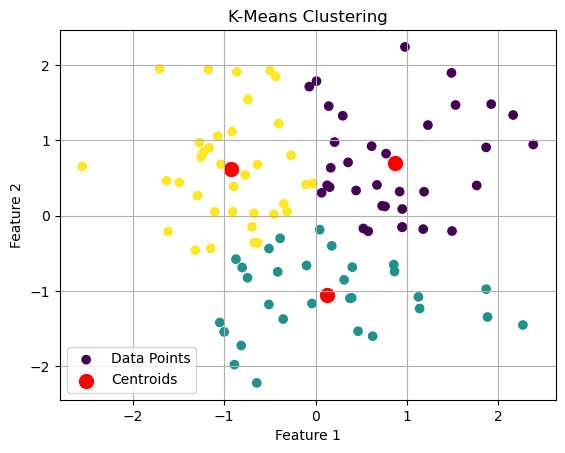

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Randomly initialize cluster centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)
            # Update centroids based on the mean of data points in each cluster
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.n_clusters)])
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        # Predict cluster labels for new data points
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get cluster centroids and labels
centroids = kmeans.centroids
labels = kmeans.predict(X)

# Plot data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


26.Write a python program to implement K Medoids algorithm with matplotlib

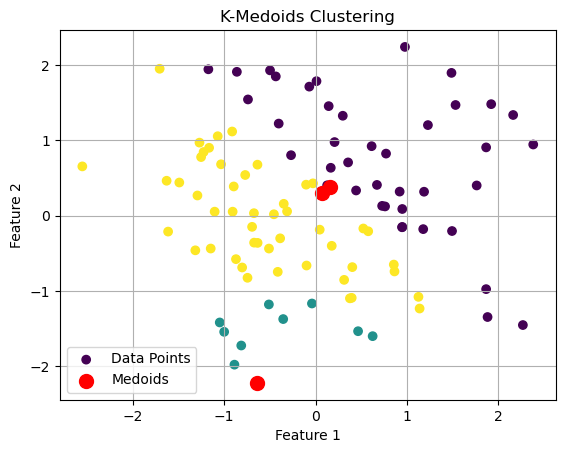

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def kmedoids(X, k, max_iter=100):
    n_samples, n_features = X.shape
    # Initialize medoids randomly
    medoids = np.random.choice(n_samples, k, replace=False)
    for _ in range(max_iter):
        # Assign each point to the closest medoid
        clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - X[medoids], axis=2), axis=1)
        # Update medoids based on the mean of data points in each cluster
        new_medoids = np.array([np.where(clusters == i)[0][np.argmin(np.sum(np.abs(X[np.where(clusters == i)] - X[np.newaxis, medoids[i]]), axis=1))] for i in range(k)])
        # Check for convergence
        if np.array_equal(medoids, new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)

# Apply K-Medoids algorithm
k = 3
medoids, clusters = kmedoids(X, k)

# Plot data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Data Points')
plt.scatter(X[medoids, 0], X[medoids, 1], marker='o', c='red', s=100, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


27.Write a python program to implement Eclat Itemset usning matplotlib

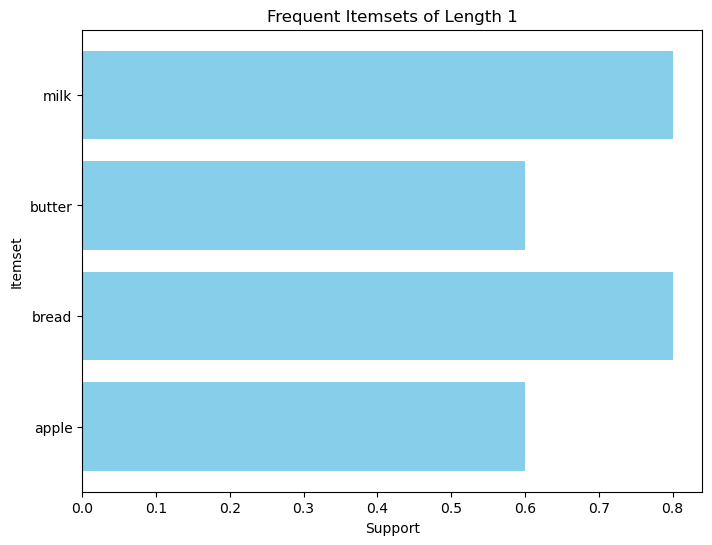

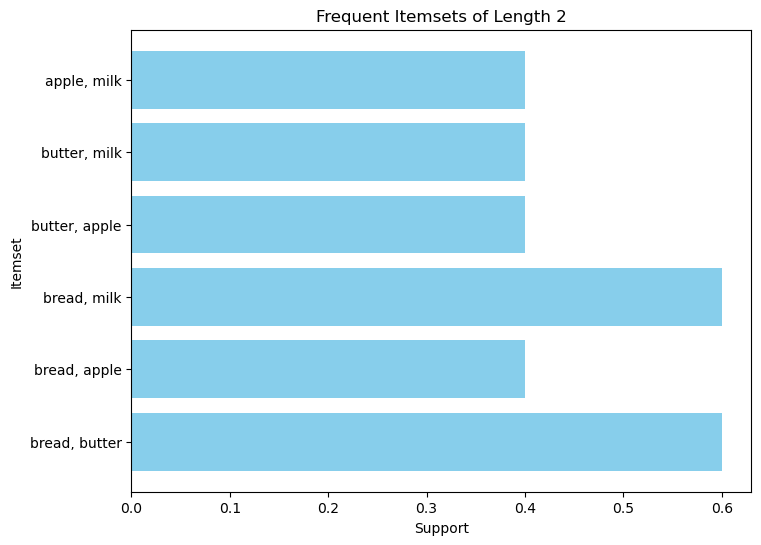

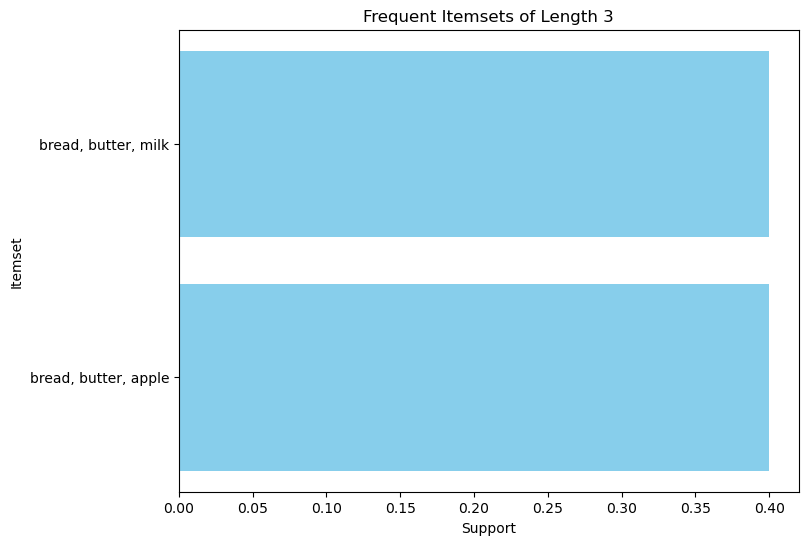

In [12]:
import matplotlib.pyplot as plt

class Eclat:
    def __init__(self, min_support=0.5):
        self.min_support = min_support
        self.freq_itemsets = {}
    
    def _generate_combinations(self, items, length):
        """Generate combinations of items of a given length."""
        from itertools import combinations
        return list(combinations(items, length))
    
    def _get_support(self, transactions, itemset):
        """Calculate support for a given itemset."""
        count = 0
        for transaction in transactions:
            if set(itemset).issubset(transaction):
                count += 1
        return count / len(transactions)
    
    def _generate_itemsets(self, transactions, items, length):
        """Generate frequent itemsets of a given length."""
        itemsets = self._generate_combinations(items, length)
        frequent_itemsets = []
        for itemset in itemsets:
            support = self._get_support(transactions, itemset)
            if support >= self.min_support:
                frequent_itemsets.append((itemset, support))
        return frequent_itemsets
    
    def _eclat(self, transactions, items, length):
        """Recursive Eclat algorithm to generate frequent itemsets."""
        frequent_itemsets = self._generate_itemsets(transactions, items, length)
        if len(frequent_itemsets) == 0:
            return
        self.freq_itemsets[length] = frequent_itemsets
        new_items = set()
        for itemset, _ in frequent_itemsets:
            new_items.update(itemset)
        new_length = length + 1
        self._eclat(transactions, new_items, new_length)
    
    def fit(self, transactions):
        """Fit Eclat model to the transactions."""
        items = set()
        for transaction in transactions:
            items.update(transaction)
        self._eclat(transactions, items, 1)
    
    def plot_frequent_itemsets(self):
        """Plot frequent itemsets."""
        for length, itemsets in self.freq_itemsets.items():
            labels = [', '.join(map(str, itemset)) for itemset, _ in itemsets]
            support = [support for _, support in itemsets]
            plt.figure(figsize=(8, 6))
            plt.barh(labels, support, color='skyblue')
            plt.xlabel('Support')
            plt.ylabel('Itemset')
            plt.title(f'Frequent Itemsets of Length {length}')
            plt.show()

# Example usage
if __name__ == "__main__":
    # Sample transactions
    transactions = [
        {'milk', 'bread', 'butter'},
        {'milk', 'bread'},
        {'milk', 'apple'},
        {'milk', 'bread', 'butter', 'apple'},
        {'bread', 'butter', 'apple'}
    ]
    
    # Minimum support threshold
    min_support = 0.4
    
    # Create and fit the Eclat model
    eclat = Eclat(min_support=min_support)
    eclat.fit(transactions)
    
    # Plot frequent itemsets
    eclat.plot_frequent_itemsets()


28.Develop a program to implement FP-tree

In [13]:
class TreeNode:
    def __init__(self, item, count=1):
        self.item = item
        self.count = count
        self.children = {}

def construct_fp_tree(transactions):
    root = TreeNode("null")
    for transaction in transactions:
        current_node = root
        for item in transaction:
            if item in current_node.children:
                current_node.children[item].count += 1
            else:
                new_node = TreeNode(item)
                current_node.children[item] = new_node
                current_node = new_node
    return root

def find_frequent_patterns(fp_tree, min_support, prefix=[]):
    frequent_patterns = []
    for item, node in fp_tree.children.items():
        if node.count >= min_support:
            frequent_patterns.append((prefix + [item], node.count))
            frequent_patterns.extend(find_frequent_patterns(node, min_support, prefix + [item]))
    return frequent_patterns

# Example usage:
if __name__ == "__main__":
    # Sample transactions (list of sets)
    transactions = [
        {'a', 'b', 'c'},
        {'a', 'b', 'd'},
        {'a', 'c'},
        {'a', 'b', 'c'},
        {'a', 'c', 'd'},
        {'b', 'c', 'd'},
        {'b', 'd'}
    ]
    min_support = 2  # Minimum support threshold

    # Construct the FP-Tree
    fp_tree = construct_fp_tree(transactions)

    # Find frequent patterns
    frequent_patterns = find_frequent_patterns(fp_tree, min_support)

    # Print frequent patterns
    print("Frequent Patterns:")
    for pattern, support in frequent_patterns:
        print(f"{pattern}: {support}")


Frequent Patterns:
['a']: 4
['d']: 4
['c']: 4
['b']: 3


29.Develop a program to implement Back propagation

In [14]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases with Xavier initialization
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(1 / self.input_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(1 / self.hidden_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def forward(self, X):
        # Forward pass through the network with ReLU activation function for hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        return self.output
    
    def backward(self, X, y, output):
        # Backpropagation with ReLU derivative
        output_error = y - output
        output_delta = output_error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.relu_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * self.learning_rate
        self.bias_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * self.learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Backpropagation
            self.backward(X, y, output)
            
            # Print loss every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss {loss}')

# Example usage:
if __name__ == "__main__":
    # Sample dataset (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    
    # Create and train the neural network
    input_size = 2
    hidden_size = 3
    output_size = 1
    learning_rate = 0.01
    epochs = 1000
    
    nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
    nn.train(X, y, epochs)
    
    # Test the trained model
    print("\nTesting:")
    for i in range(len(X)):
        x_test = X[i]
        y_true = y[i]
        y_pred = nn.forward(x_test)
        print(f"Input: {x_test}, True: {y_true}, Predicted: {y_pred}")


Epoch 0: Loss 0.5260827653799802
Epoch 100: Loss 0.205415137440954
Epoch 200: Loss 0.18157165566858874
Epoch 300: Loss 0.16693295904654792
Epoch 400: Loss 0.15323005733937128
Epoch 500: Loss 0.13332518143865055
Epoch 600: Loss 0.09978172834285304
Epoch 700: Loss 0.0554272690262209
Epoch 800: Loss 0.02064124581448839
Epoch 900: Loss 0.005665582998316711

Testing:
Input: [0 0], True: [0], Predicted: [[0.06255332]]
Input: [0 1], True: [1], Predicted: [[0.98231535]]
Input: [1 0], True: [1], Predicted: [[0.95435999]]
Input: [1 1], True: [0], Predicted: [[0.02210657]]


30.Develop a program to implement Naïve bayes classification

In [15]:
import numpy as np

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))
        self.stds = np.zeros((self.n_classes, X.shape[1]))
        self.class_prior = np.zeros(self.n_classes)
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[i] = X_c.mean(axis=0)
            self.stds[i] = X_c.std(axis=0)
            self.class_prior[i] = len(X_c) / len(X)
    
    def _calculate_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
        return np.prod((1 / (np.sqrt(2 * np.pi) * std)) * exponent, axis=1)
    
    def predict(self, X):
        probabilities = np.zeros((X.shape[0], self.n_classes))
        for i, c in enumerate(self.classes):
            class_probability = self.class_prior[i]
            feature_probabilities = self._calculate_probability(X, self.means[i], self.stds[i])
            probabilities[:, i] = feature_probabilities * class_probability
        return np.argmax(probabilities, axis=1)

# Example usage:
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
    y = np.array([0, 0, 0, 1, 1, 1])
    
    # Create and fit the Gaussian Naive Bayes classifier
    clf = GaussianNaiveBayes()
    clf.fit(X, y)
    
    # Predict labels for new data
    new_data = np.array([[2.5, 3.5], [5.5, 6.5]])
    predicted_labels = clf.predict(new_data)
    print("Predicted labels:", predicted_labels)


Predicted labels: [0 1]
